<a href="https://colab.research.google.com/github/i383993/PRODIGY_DS_02/blob/main/Prodigy_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Exploratory Data Analysis (EDA)

## **Data PreProcessing**

In [44]:
!pip install pandas
import pandas as pd
df = pd.read_csv('/content/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Data Cleaning**

**Missing Values**

In [45]:

null_values_check = df.isnull().sum()

# Print the results
print(null_values_check)




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Age

In [46]:

# Display initial state of missing values
print("Initial missing values in 'Age':", df['Age'].isnull().sum())

# Function to fill missing ages based on median values grouped by 'Pclass' and 'Sex'
def impute_age(df):
    for pclass in df['Pclass'].unique():
        for sex in df['Sex'].unique():
            median_age = df[(df['Pclass'] == pclass) & (df['Sex'] == sex)]['Age'].median()
            df.loc[(df['Age'].isnull()) & (df['Pclass'] == pclass) & (df['Sex'] == sex), 'Age'] = median_age
    return df

# Apply the function to the dataframe
df = impute_age(df)

# Display final state of missing values
print("Final missing values in 'Age':", df['Age'].isnull().sum())


Initial missing values in 'Age': 177
Final missing values in 'Age': 0


Cabin

In [47]:

# Display initial state of missing values in 'Cabin'
print("Initial missing values in 'Cabin':", df['Cabin'].isnull().sum())

# Sort by 'Ticket' and 'Fare' to group similar entries together
df.sort_values(by=['Ticket', 'Fare'], inplace=True)

# Forward fill missing 'Cabin' values
df['Cabin_ffill'] = df['Cabin'].fillna(method='ffill')

# Backward fill missing 'Cabin' values
df['Cabin_bfill'] = df['Cabin_ffill'].fillna(method='bfill')

# Fill original 'Cabin' column with the forward-backward filled values
df['Cabin'] = df['Cabin_bfill']

# Drop the temporary columns used for filling
df.drop(columns=['Cabin_ffill', 'Cabin_bfill'], inplace=True)

# Display the final state of missing values in 'Cabin'
print("Final missing values in 'Cabin':", df['Cabin'].isnull().sum())

# Display the first few rows of the dataframe to inspect the results
print(df.head())


Initial missing values in 'Cabin': 687
Final missing values in 'Cabin': 0
     PassengerId  Survived  Pclass  \
257          258         1       1   
504          505         1       1   
759          760         1       1   
262          263         0       1   
558          559         1       1   

                                                  Name     Sex   Age  SibSp  \
257                               Cherry, Miss. Gladys  female  30.0      0   
504                              Maioni, Miss. Roberta  female  16.0      0   
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  female  33.0      0   
262                                  Taussig, Mr. Emil    male  52.0      1   
558             Taussig, Mrs. Emil (Tillie Mandelbaum)  female  39.0      1   

     Parch  Ticket   Fare Cabin Embarked  
257      0  110152  86.50   B77        S  
504      0  110152  86.50   B79        S  
759      0  110152  86.50   B77        S  
262      1  110413  79.65   E67        S  
558    

Embarked

In [48]:


# Check for missing values in 'Embarked'
print("Initial missing values in 'Embarked':", df['Embarked'].isnull().sum())

# Identify rows with missing 'Embarked' values
missing_embarked = df[df['Embarked'].isnull()]

# Explore the data around missing values
print("Details of passengers with missing 'Embarked':")
print(missing_embarked)

# Impute missing 'Embarked' values with the mode
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

# Verify if missing values have been filled
print("Final missing values in 'Embarked':", df['Embarked'].isnull().sum())

# Display the first few rows of the dataframe to inspect the results
print(df.head())


Initial missing values in 'Embarked': 2
Details of passengers with missing 'Embarked':
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  
Final missing values in 'Embarked': 0
     PassengerId  Survived  Pclass  \
257          258         1       1   
504          505         1       1   
759          760         1       1   
262          263         0       1   
558          559         1       1   

                                                  Name     Sex   Age  SibSp  \
257                               Cherry, Miss. Gladys  female  30.0      0   
504                              Maioni, Miss. Roberta 

In [49]:

null_values_check = df.isnull().sum()

# Print the results
print(null_values_check)




PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


**Duplicates**

In [50]:

# Check for duplicates based on all columns
duplicate_rows = df[df.duplicated()]

# Check if there are any duplicates
if duplicate_rows.shape[0] > 0:
    print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


# **Exploratory Data Analysis (EDA)bold text**

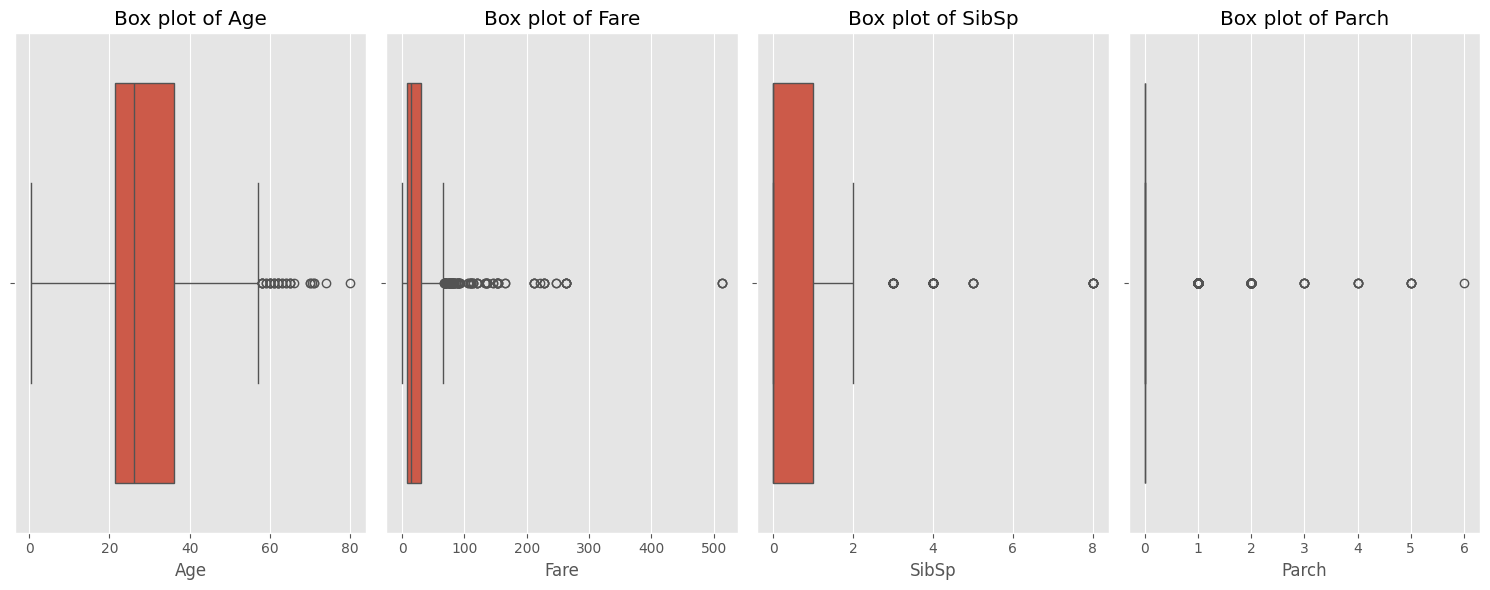

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify numerical columns to check for outliers
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

# Set up the plot style
plt.style.use('ggplot')

# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 6))

# Plot box plots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()


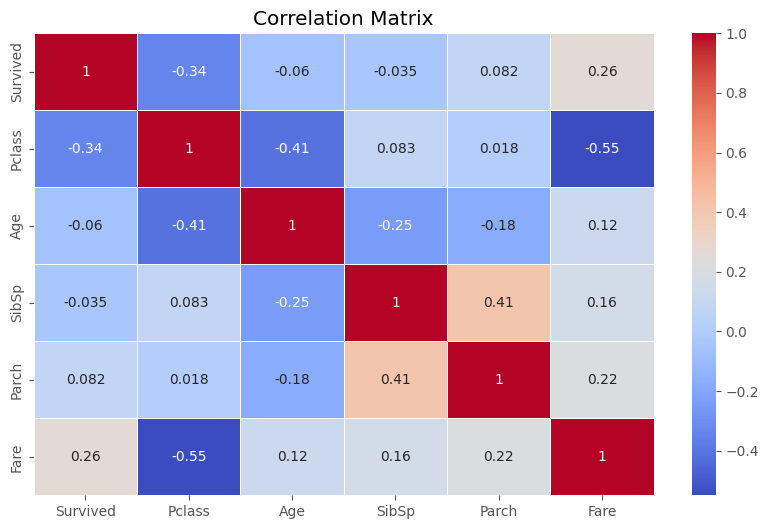

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select numeric columns for correlation analysis
numeric_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


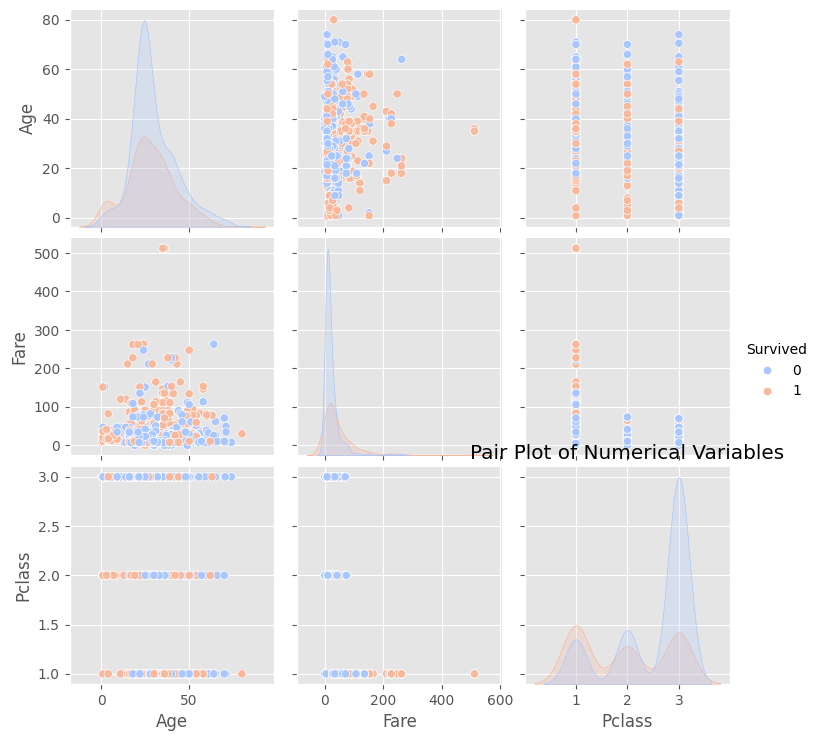

In [53]:
# Pair plot for numerical variables
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='coolwarm')
plt.title('Pair Plot of Numerical Variables')
plt.show()

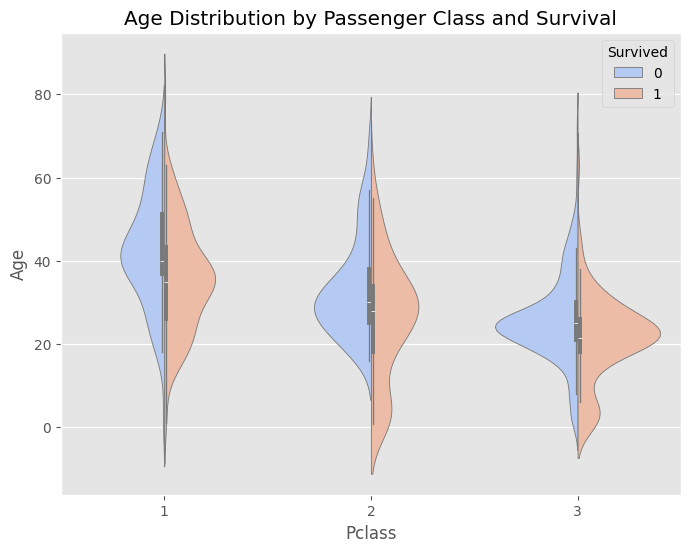

In [54]:
# Violin plot for Age distribution by passenger class
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', palette='coolwarm', split=True)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Age Distribution by Passenger Class and Survival')
plt.show()

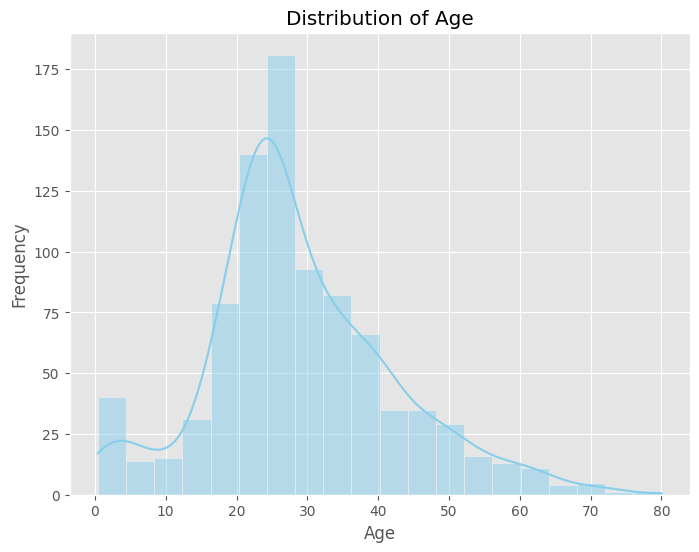

In [55]:
# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

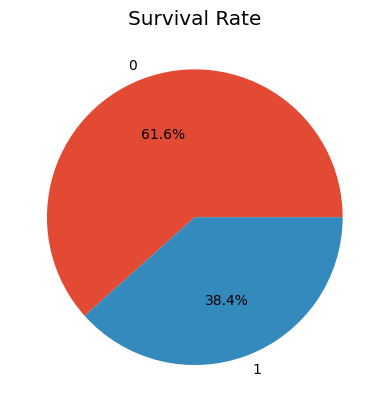

In [56]:
# Plot of Survival Rate
def plot_survival_rate(df):
    #Create a figure
    fig, ax = plt.subplots()

    # Plot the churn rate
    ax.pie(df['Survived'].value_counts(), labels=df['Survived'].value_counts().index, autopct='%1.1f%%')

    # Add a title
    ax.set_title('Survival Rate')

    # Show the plot
    plt.show()
plot_survival_rate(df)

<ipython-input-57-85b68bfccff1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='Blues')


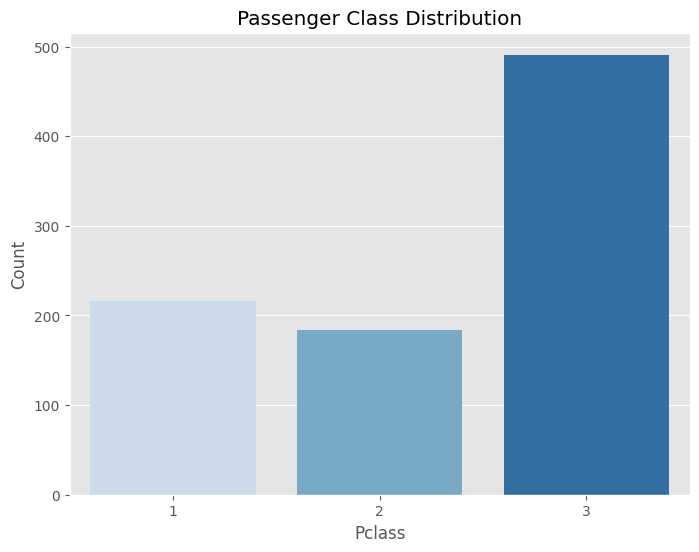

In [57]:
# Bar plot for Pclass
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', palette='Blues')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Passenger Class Distribution')
plt.show()